# Function Fitting

In [1]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
import DC_Pickle as dcp
import Curve_Functions as cv
import matplotlib.pyplot as plt
%matplotlib inline

def disp_Data(x_axis, y_axis, colour_shape='b.', rows=1, columns=1, size=(10, 5)):
    fig, axes = plt.subplots(rows, columns, figsize=size)
    axes.plot(x_axis, y_axis, colour_shape)
    plt.show()

## load data

In [2]:
train_idx = dcp.open_Pickle("../../data/pickles/clusters_origin/indices/index13.pickle")
train_idx = train_idx[5] #2

train_scores = dcp.open_Pickle('../../data/pickles/seperate_origin/eventValue.pickle')
train_scores = train_scores/1e+4
attempts = np.arange(15)+1

## filtering discontinuous under 15 attempts
idx_all = []
idx_pure = []

for i in range(train_scores.shape[1]):
    if not np.isnan(train_scores[:15, i]).any():
        idx_all.append(i)
        idx_pure.append(i)
    else:
        idx_all.append(np.nan)

train_scores = train_scores[:, idx_pure]
print("Training data set: {0}".format(np.shape(train_scores)))

Training data set: (301, 22832)


In [3]:
## get cluster data and cluster average data (average is centroid)
nClt = 13
for i in range(nClt):
    name = "cluster{0}".format(i+1)
    globals()[name] = train_scores[:, train_idx==i] # get cluster data
    
    ## get cluster average data
    data = np.ones(301)
    for j in range(len(data)):
        avg = eval(name)[j, :]
        avg = np.sum(avg[~np.isnan(avg)])/len(avg[~np.isnan(avg)])
        data[j] = avg

    globals()["avg{0}".format(i+1)] = data

## make folder for each function

In [4]:
dcp.make_folders("Figs/curve_fitting/")

Figs/curve_fitting/ already present - Skipping pickling.


### exponential fit

#### Two parameters

Figs/curve_fitting/exponential2 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ 2.9814107  -0.04246924]
 - Curve Fitting Cost: 2.7993318014921655

cluster 2:
 - Curve Fitting Parameters: [ 1.10388489  0.05595459]
 - Curve Fitting Cost: 3.6371508974365354

cluster 3:
 - Curve Fitting Parameters: [ 0.93648289  0.06850902]
 - Curve Fitting Cost: 5.33053808771556

cluster 4:
 - Curve Fitting Parameters: [ 1.65773801  0.01449939]
 - Curve Fitting Cost: 3.8899714872350635

cluster 5:
 - Curve Fitting Parameters: [ 1.37919898  0.03447734]
 - Curve Fitting Cost: 6.154183046104504

cluster 6:
 - Curve Fitting Parameters: [ 1.46208268  0.02717172]
 - Curve Fitting Cost: 6.180971573334928

cluster 7:
 - Curve Fitting Parameters: [ 1.84752402  0.00645741]
 - Curve Fitting Cost: 3.3198818058670088

cluster 8:
 - Curve Fitting Parameters: [ 1.90533439  0.00558654]
 - Curve Fitting Cost: 3.401693075756196

cluster 9:
 - Curve Fitting Parameters: [ 0.78643378  0.08048826

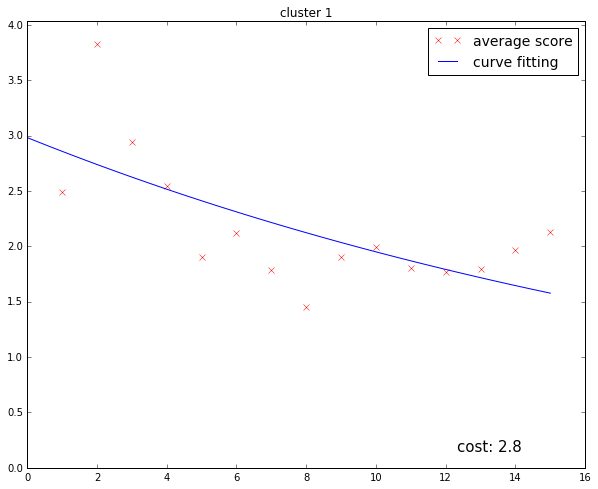

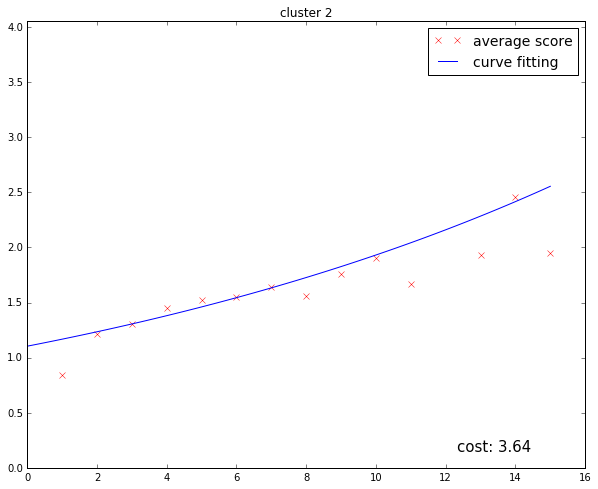

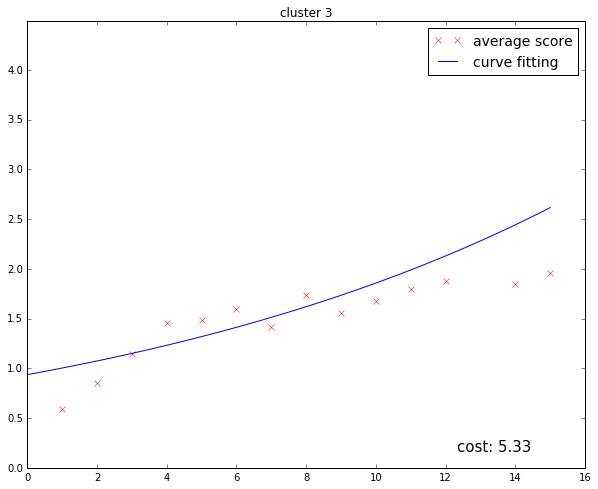

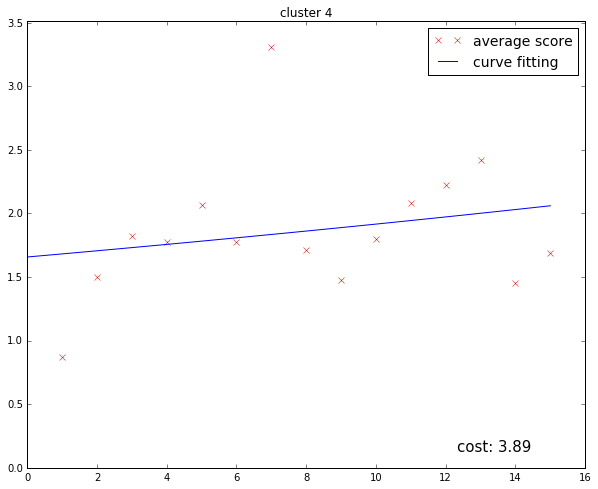

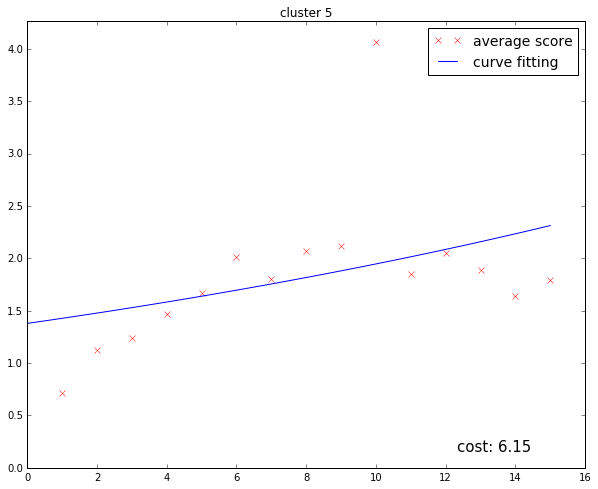

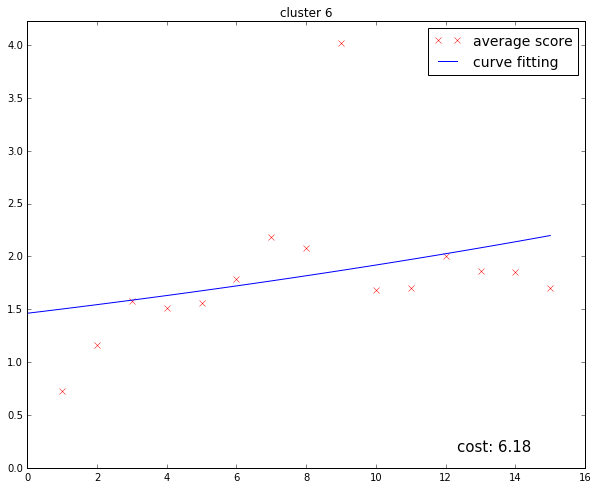

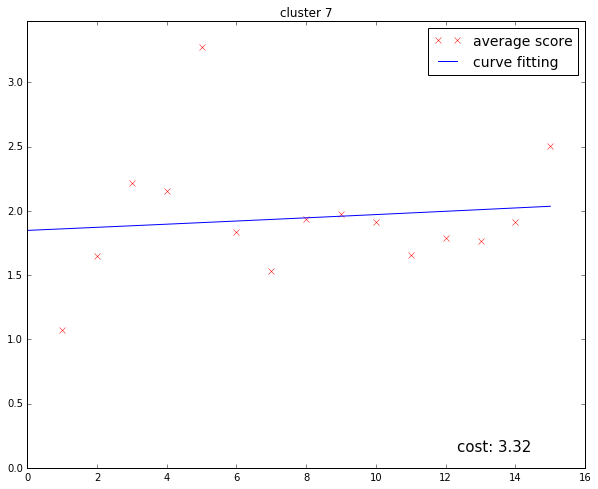

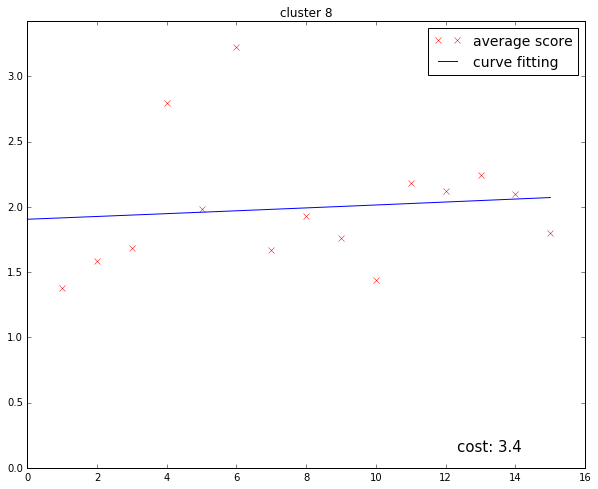

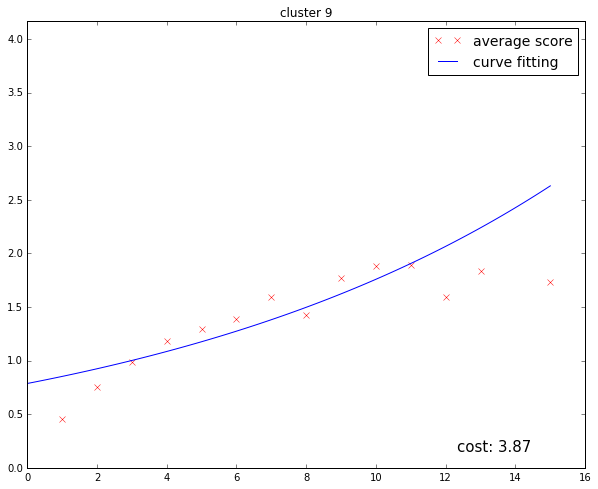

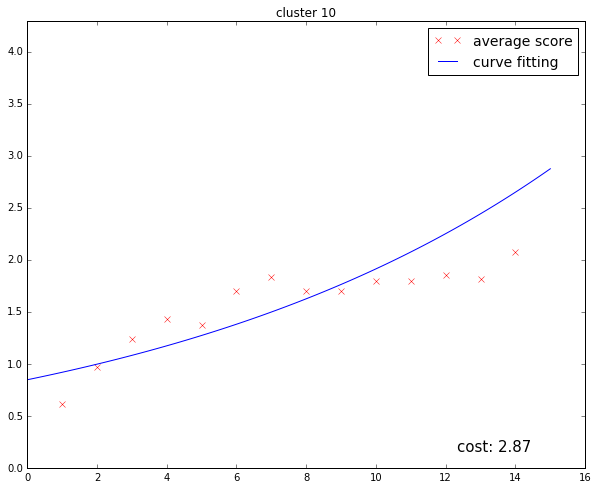

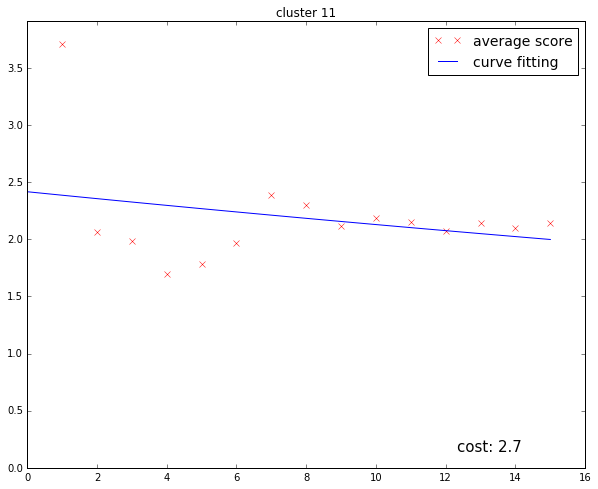

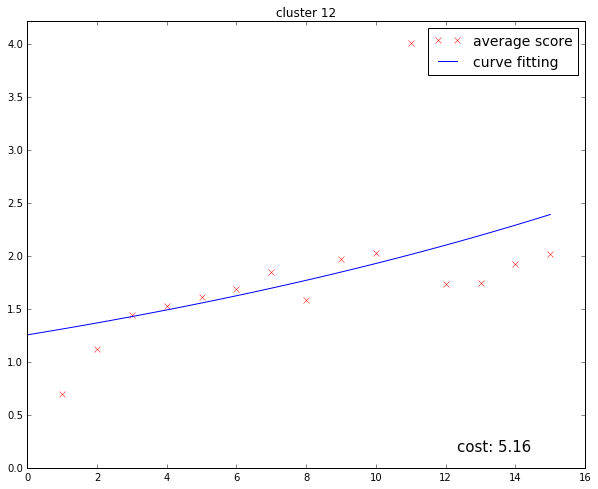

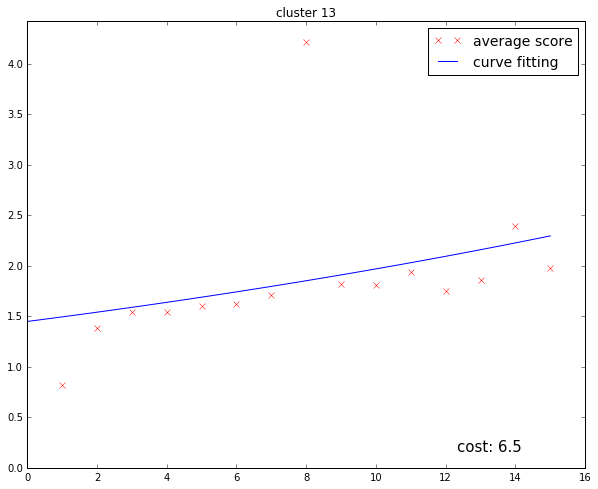

In [5]:
dcp.make_folders("Figs/curve_fitting/exponential2")

for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "exp2_opt{0}".format(i+1)
    cov = "exp2_cov{0}".format(i+1)
    cost = "exp2_cost{0}".format(i+1)
    opt, cov, cost = cv.curve_Fitting(
        cv.exponential_curve2, attempts, eval("avg{0}".format(i+1))[:15], 
        "Figs/curve_fitting/exponential2/{0}".format(i+1), clt_num = i+1)

#### Three parameters

Figs/curve_fitting/exponential3 already present - Skipping pickling.
cluster 1:
 - Curve Fitting Parameters: [ 1.90063919  0.2566857   1.73839839]
 - Curve Fitting Cost: 2.210677840360955

cluster 2:
 - Curve Fitting Parameters: [-2.75493949  0.06019817  3.53497243]
 - Curve Fitting Cost: 3.4484069518660725

cluster 3:
 - Curve Fitting Parameters: [ -8.58354249  24.19364132   1.68672985]
 - Curve Fitting Cost: 9.290055873480812



/usr/local/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


cluster 4:
 - Curve Fitting Parameters: [-2.72656182  0.87970311  1.99373092]
 - Curve Fitting Cost: 2.8229202526514956

cluster 5:
 - Curve Fitting Parameters: [-12.09693048  23.60117216   1.83340315]
 - Curve Fitting Cost: 7.496918860553389

cluster 6:
 - Curve Fitting Parameters: [-2.20839583  0.4458232   2.08904626]
 - Curve Fitting Cost: 4.638032776278582

cluster 7:
 - Curve Fitting Parameters: [  1.89055919e+02  -6.82209871e-05  -1.87212925e+02]
 - Curve Fitting Cost: 3.31863310961901

cluster 8:
 - Curve Fitting Parameters: [-1.99715925  0.95907011  2.07569859]
 - Curve Fitting Cost: 2.8544383799700017

cluster 9:
 - Curve Fitting Parameters: [ -6.26123695  25.42972646   1.58405822]
 - Curve Fitting Cost: 8.595774034541765

cluster 10:
 - Curve Fitting Parameters: [ -4.31609087e+03   3.04536191e-05   4.31677148e+03]
 - Curve Fitting Cost: 3.1645108041346544

cluster 11:
 - Curve Fitting Parameters: [  1.03036282e+05   1.10552528e+01   2.07816825e+00]
 - Curve Fitting Cost: 0.42

'\nseed = np.array([1, 1, 1])\nexp3_lqe = least_squares(cv.exponential_least3, seed, args=(attempts, scores))\nprint("Least Square Parameters: {0}, Cost: {1}".format(exp3_lqe.x, exp3_lqe.cost))\n\nexp3_opt, exp3_cov, exp3_cost = curve_Fitting(cv.exponential_curve3, attempts, scores, \'Exp3\')\n'

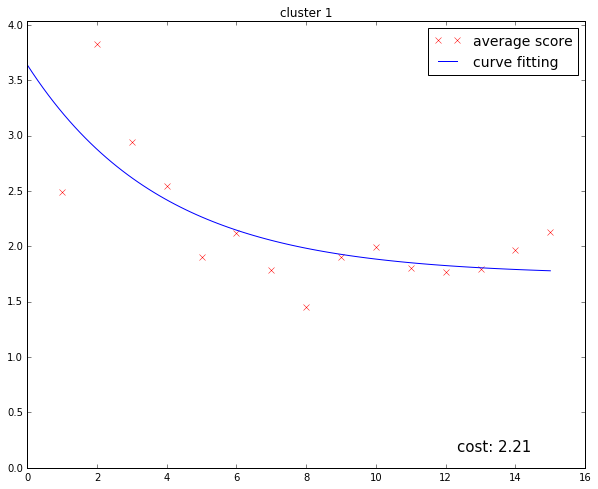

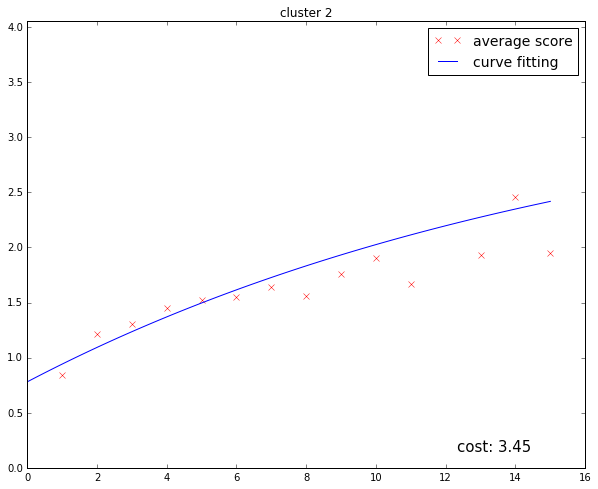

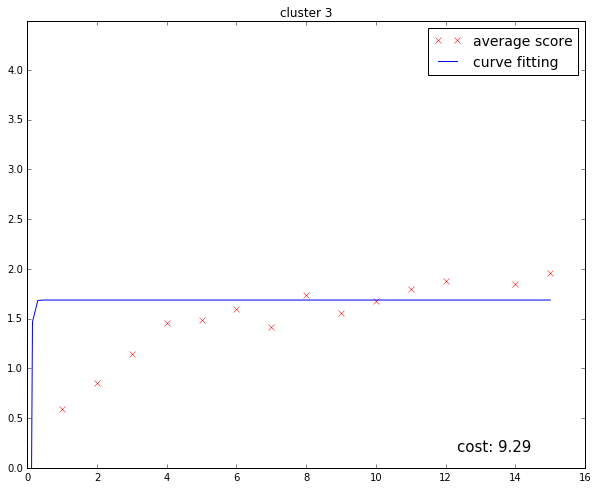

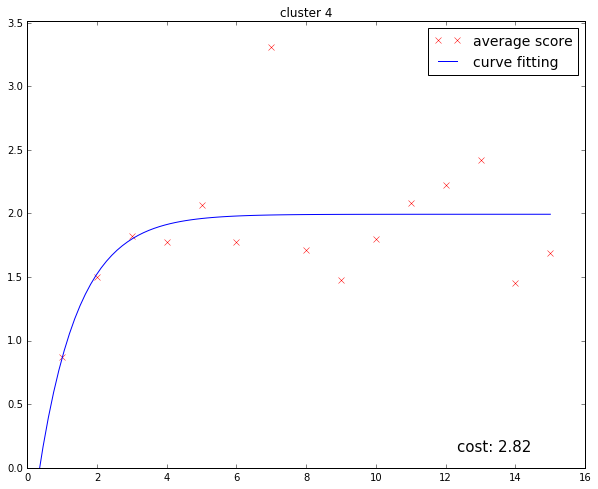

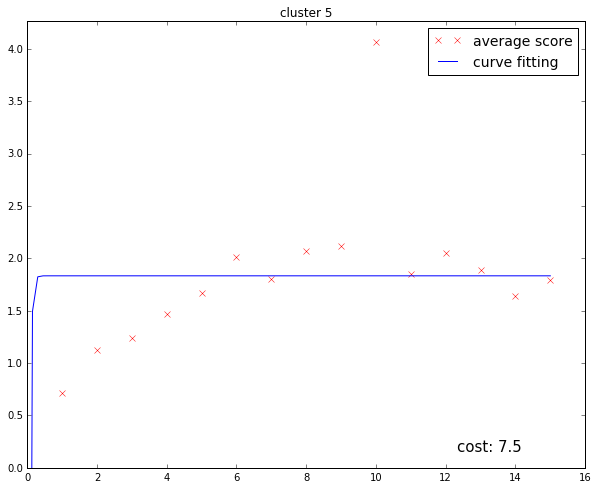

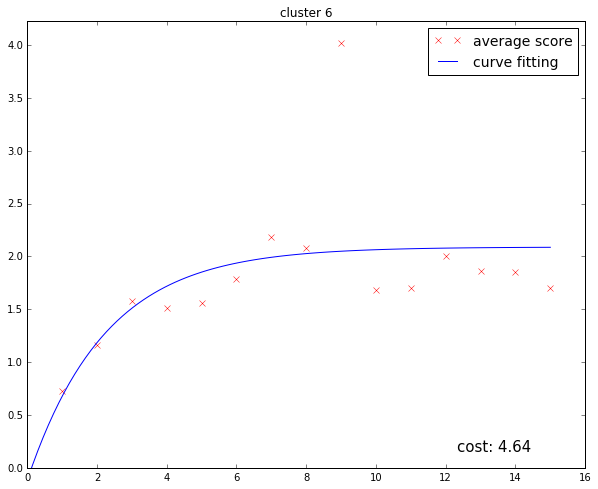

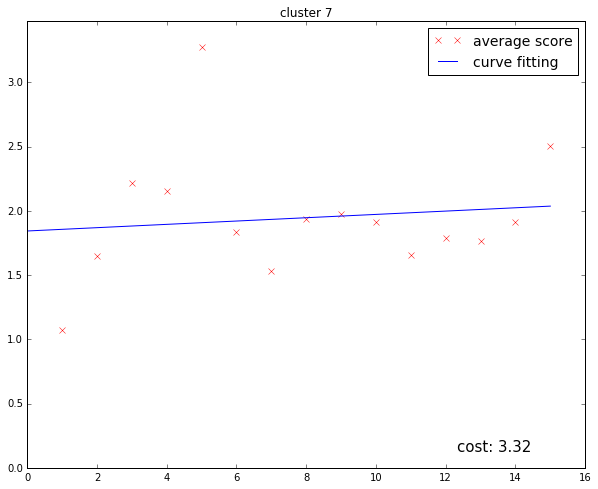

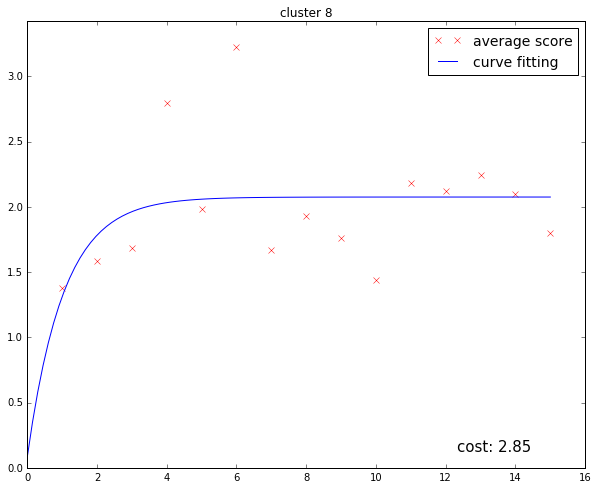

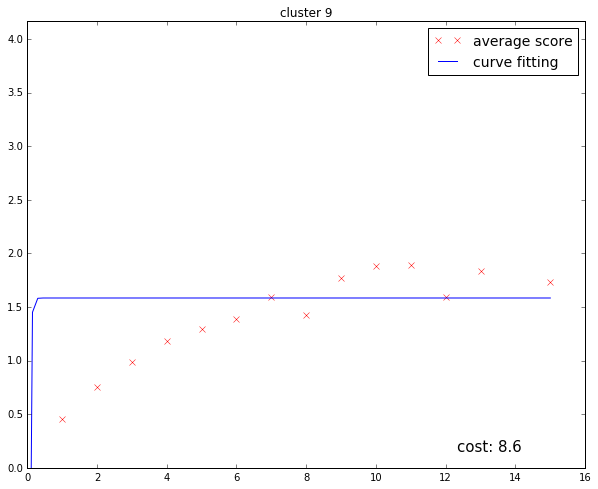

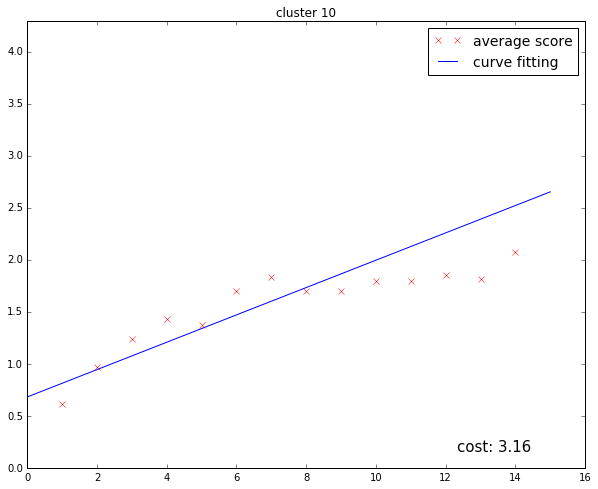

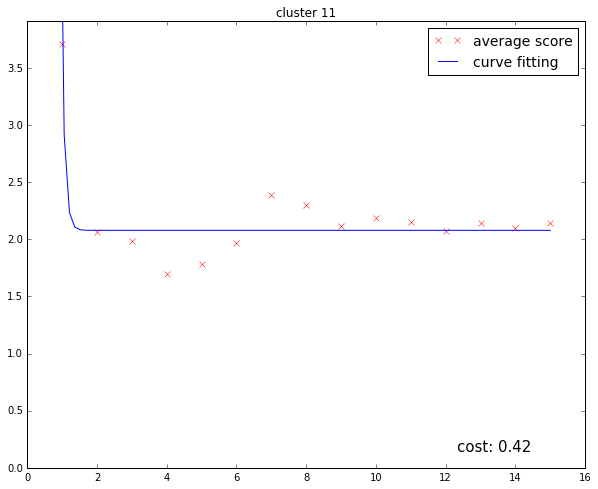

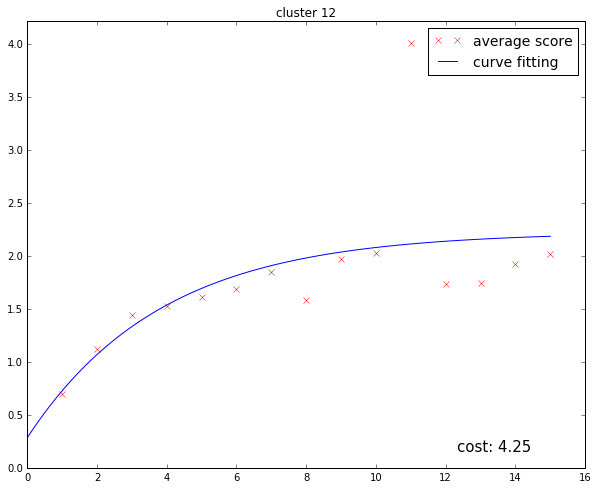

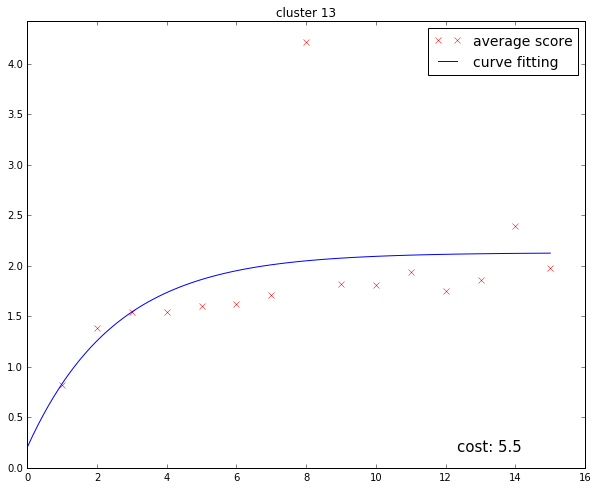

In [6]:
dcp.make_folders("Figs/curve_fitting/exponential3")

for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "exp3_opt{0}".format(i+1)
    cov = "exp3_cov{0}".format(i+1)
    cost = "exp3_cost{0}".format(i+1)
    opt, cov, cost = cv.curve_Fitting(
        cv.exponential_curve3, attempts, eval("avg{0}".format(i+1))[:15], 
        "Figs/curve_fitting/exponential3/{0}".format(i+1), clt_num = i+1)

'''
seed = np.array([1, 1, 1])
exp3_lqe = least_squares(cv.exponential_least3, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(exp3_lqe.x, exp3_lqe.cost))

exp3_opt, exp3_cov, exp3_cost = curve_Fitting(cv.exponential_curve3, attempts, scores, 'Exp3')
'''

/usr/local/lib/python3.5/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


 - Curve Fitting Parameters: [ -8.58354249  24.19364132   1.68672985]
 - Curve Fitting Cost: 9.290055873480812

Least Square Parameters: [-3.30202458  0.05739812  3.83768361], Cost: 2.5376727639143004


NameError: name 'ax' is not defined

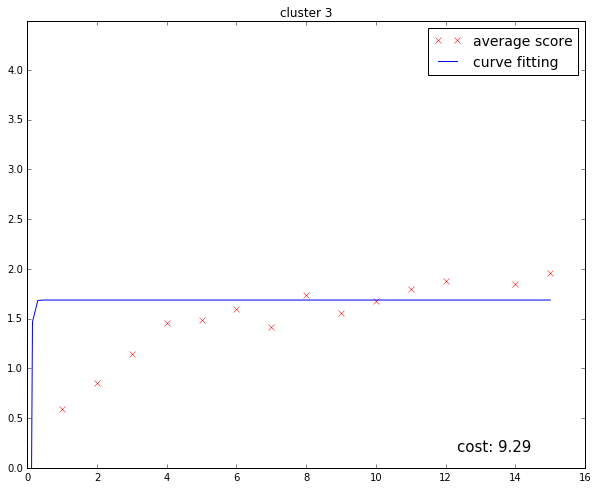

In [14]:
opt, cov, cost = cv.curve_Fitting(
        cv.exponential_curve3, attempts, eval("avg{0}".format(2+1))[:15], 
        "Figs/curve_fitting/exponential3/{0}".format(2+1), clt_num = 2+1)

seed = np.array([1, 1, 1])
scores = eval("avg{0}".format(2+1))[:15]

exp3_lqe = least_squares(cv.exponential_least3, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(exp3_lqe.x, exp3_lqe.cost))
x_fit = np.linspace(0, 15, 100)
y_mean = cv.exponential_curve3(x_fit, exp3_lqe.x[0], exp3_lqe.x[1], exp3_lqe.x[2])
plt.plot(attempts, scores, 'rx', label="average score")
.plot(x_fit, y_mean, 'b-', label="curve fitting")  

### polynoimial fit

In [ ]:
dcp.make_folders("Figs/curve_fitting/polynomial2")

for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "poly2_opt{0}".format(i+1)
    cov = "poly2_cov{0}".format(i+1)
    cost = "poly2_cost{0}".format(i+1)
    opt, cov, cost = cv.curve_Fitting(
        cv.polynomial_curve, attempts, eval("avg{0}".format(i+1))[:15], 
        "Figs/curve_fitting/polynomial2/{0}".format(i+1), clt_num = i+1)

# poly_opt, poly_cov, poly_cost = curve_Fitting(cv.polynomial_curve, attempts, scores, 'Poly1')

### power law fit

#### Two parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw2")

for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "pl2_opt{0}".format(i+1)
    cov = "pl2_cov{0}".format(i+1)
    cost = "pl2_cost{0}".format(i+1)
    opt, cov, cost = cv.curve_Fitting(
        cv.powerlaw_curve3, attempts, eval("avg{0}".format(i+1))[:15], 
        "Figs/curve_fitting/powerlaw2/{0}".format(i+1), clt_num = i+1)
'''
seed = np.array([1, 1])
pl2_lqe = least_squares(cv.powerlaw_least2, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl2_lqe.x, pl2_lqe.cost))

pl2_opt, pl2_cov, pl2_cost = curve_Fitting(cv.powerlaw_curve2, attempts, scores, 'power2')
'''

#### Thress parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw3")

for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "pl3_opt{0}".format(i+1)
    cov = "pl3_cov{0}".format(i+1)
    cost = "pl3_cost{0}".format(i+1)
    opt, cov, cost = cv.curve_Fitting(
        cv.powerlaw_curve3, attempts, eval("avg{0}".format(i+1))[:15], 
        "Figs/curve_fitting/powerlaw3/{0}".format(i+1), clt_num = i+1)

'''
seed = np.array([1, 1, 1])
pl3_lqe = least_squares(cv.powerlaw_least3, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl3_lqe.x, pl3_lqe.cost))

pl3_opt, pl3_cov, pl3_cost = curve_Fitting(cv.powerlaw_curve3, attempts, scores, 'power3')
'''

#### Four parameters

In [ ]:
dcp.make_folders("Figs/curve_fitting/powerlaw4")

for i in range(nClt):
    print("cluster {0}:".format(i+1))
    opt = "pl4_opt{0}".format(i+1)
    cov = "pl4_cov{0}".format(i+1)
    cost = "pl4_cost{0}".format(i+1)
    opt, cov, cost = cv.curve_Fitting(
        cv.powerlaw_curve4, attempts, eval("avg{0}".format(i+1))[:15], 
        "Figs/curve_fitting/powerlaw4/{0}".format(i+1), clt_num = i+1)

'''
seed = np.array([1, 1, 1, 1])
pl4_lqe = least_squares(cv.powerlaw_least4, seed, args=(attempts, scores))
print("Least Square Parameters: {0}, Cost: {1}".format(pl4_lqe.x, pl4_lqe.cost))

pl4_opt, pl4_cov, pl4_cost = curve_Fitting(cv.powerlaw_curve4, attempts, scores, 'power4')
'''